In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [29]:
# Reading file from iMDB database

df = pd.read_csv('title.basics.tsv.gz', delimiter = '\t')

df.head(10)

C:\Users\khusaai1\AppData\Local\Temp\1\ipykernel_25408\1984062076.py:1: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [139]:
# Excluding END YEAR

df = df.loc[:,df.columns!='endYear']
df.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,1,Short
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,1,"Documentary,Short"


In [106]:
# Selecting titles typed as Movie and Year = 2024 and excluding null runtimes

df2024 = df[(df['startYear'].isin(['2024'])) & (df['titleType'] == 'movie') & (df['runtimeMinutes'] != '\\N' ) & (df['genres'] != '\\N' )]

df2024.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
194415,tt0202523,movie,The Perfect Shadow,The Perfect Shadow,0,2024,82,Drama
274712,tt0287075,movie,Universal Groove,Universal Groove,0,2024,74,"Drama,Fantasy"
313706,tt0327785,movie,The Killer's Game,The Killer's Game,0,2024,104,"Action,Comedy,Thriller"
352568,tt0368133,movie,The Promise of Perfume,The Promise of Perfume,0,2024,57,Documentary
359195,tt0375008,movie,Remedy,Remedy,0,2024,82,"Crime,Drama"
433035,tt0451272,movie,Nefarious,Nefarious,0,2024,85,"Crime,Thriller"
435222,tt0453528,movie,On Moral Grounds,On Moral Grounds,0,2024,74,"Documentary,History,War"
758810,tt0783848,movie,"L'homme au bâton, une légende créole","L'homme au bâton, une légende créole",0,2024,81,Comedy
972620,tt10009608,movie,Maybe It's True What They Say About Us,Quizás es cierto lo que dicen de nosotras,0,2024,94,"Drama,Thriller"
974783,tt10013512,movie,The Problem with People,The Problem with People,0,2024,102,Comedy


In [136]:
# Counting genres

top 20 = df2024.genres.value_counts().head(20)

genres
Documentary             3310
Drama                   2350
Comedy                   893
Horror                   534
Thriller                 452
Comedy,Drama             288
Action                   242
Romance                  228
Drama,Romance            194
Comedy,Romance           150
Drama,Thriller           149
Horror,Thriller          148
Crime                    128
Music                     96
Comedy,Drama,Romance      92
Documentary,Music         90
Action,Crime,Drama        87
Family                    85
Sci-Fi                    85
Animation                 85
Name: count, dtype: int64

In [103]:
# Dropping rows with more than one genre

top20 = top20.drop(['Comedy,Drama','Drama,Romance','Comedy,Romance','Drama,Thriller','Horror,Thriller','Comedy,Drama,Romance','Documentary,Music',
            'Action,Crime,Drama'])

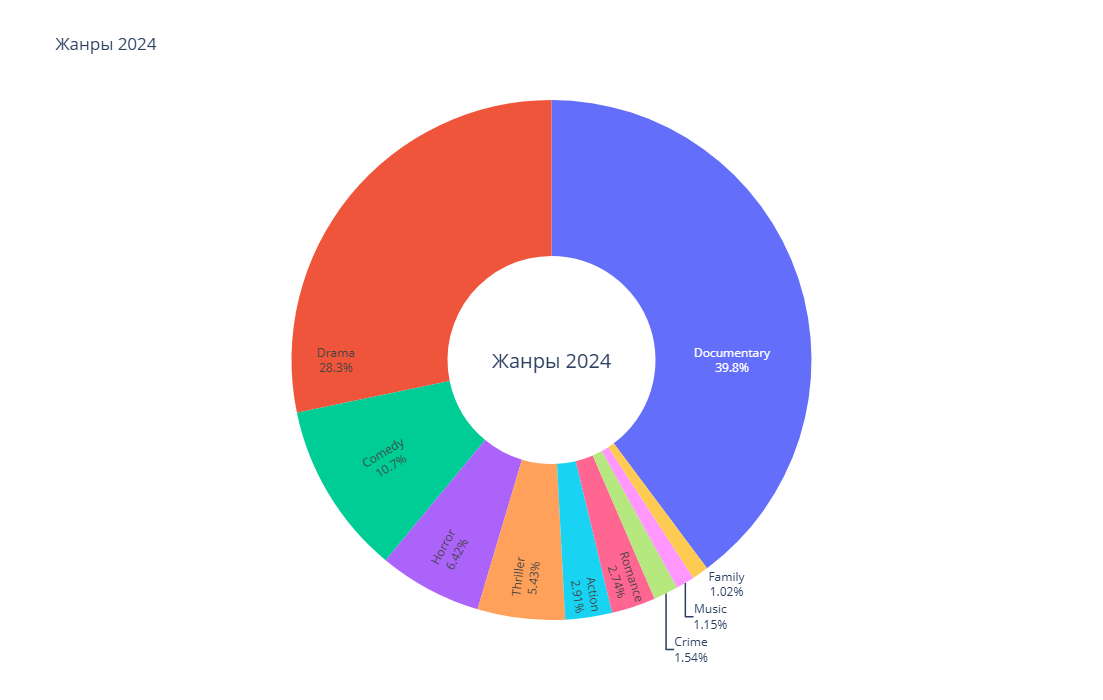

In [138]:

# Making pie chart

labels = ['Documentary','Drama','Comedy','Horror','Thriller', 'Action','Romance','Crime','Music','Family']
values = [3310, 2350, 893, 534,452,242,228,128,96,85]

# Use `hole` to create a donut-like pie chart
# fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent', insidetextorientation = 'radial')])
fig.update_traces(hole=.4, insidetextorientation='radial')

fig.update_layout(
    # Add annotations in the center of the donut pies.
    title_text="Жанры 2024", 
    showlegend=False,

    autosize=False,
    width=700,
    height=700


)

fig.show()


In [89]:
top.head(50)

genres
Documentary                   3310
Drama                         2350
Comedy                         893
Horror                         534
Thriller                       452
Comedy,Drama                   288
Action                         242
Romance                        228
Drama,Romance                  194
Comedy,Romance                 150
Drama,Thriller                 149
Horror,Thriller                148
Crime                          128
Music                           96
Comedy,Drama,Romance            92
Documentary,Music               90
Action,Crime,Drama              87
Family                          85
Sci-Fi                          85
Animation                       85
Comedy,Horror                   83
Crime,Drama                     76
Biography,Documentary           71
Mystery                         64
Action,Thriller                 59
Drama,Family                    59
Fantasy                         58
Biography                       54
Crime,Drama,T